# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_10004/1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


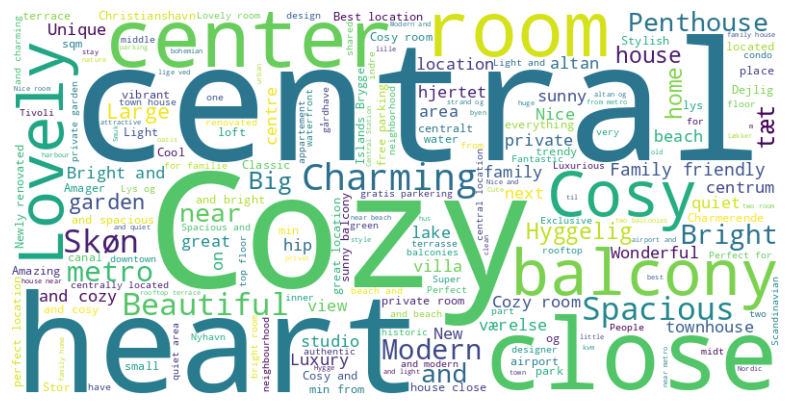

In [2]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

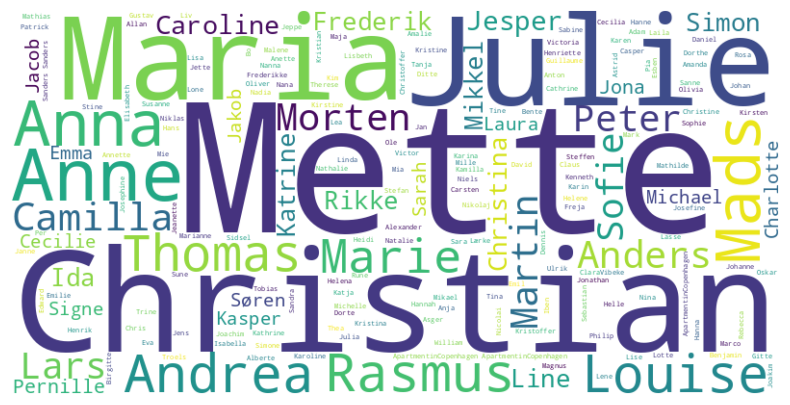

In [3]:
# Filter out non-person names
person_names = data_filtered[data_filtered['host_name'].str.isalpha()]['host_name']

# Convert the 'host_name' column to a single string
text = ' '.join(person_names.astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [ ]:
import folium

# State your solution here. Add more cells if needed.
# Create a map centered around Copenhagen
map = folium.Map(location=[55.6761, 12.5683], zoom_start=13)

coordinates_table = data[["id",
    "name",
    "latitude"  ,
    "longitude"]]

for index, row in coordinates_table.head(100).iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(map)

map

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

/tmp/ipykernel_10004/3432370838.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data.head(100), x="price", y="neighbourhood_cleansed", whis=[0, 100], width=.6, palette="vlag")


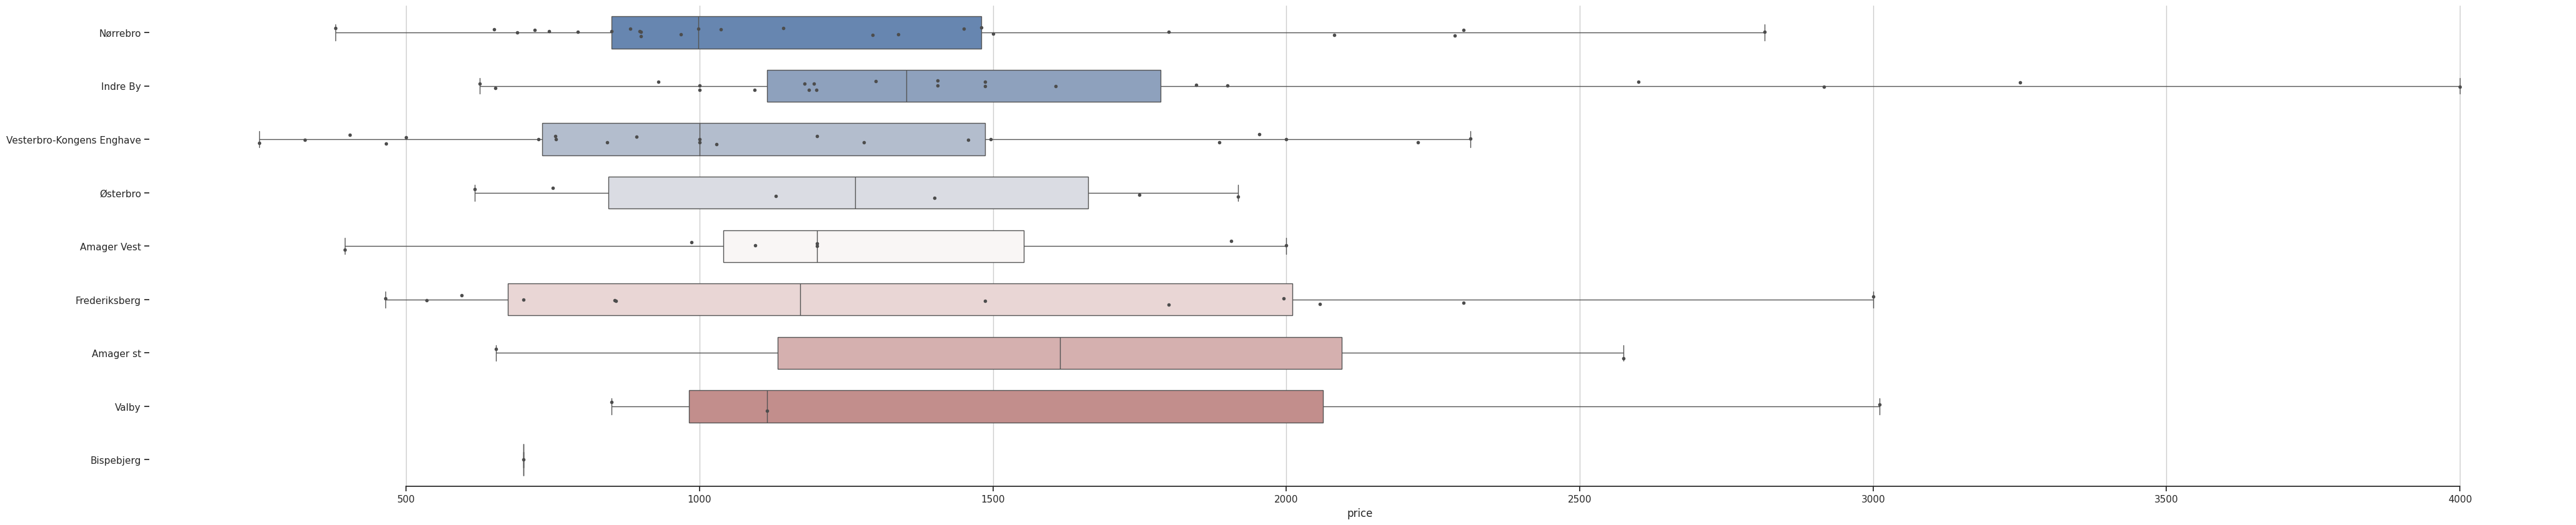

In [9]:
# State your solution here. Add more cells if needed.
import seaborn as sns
import matplotlib.pyplot as plt

data = data_filtered[["neighbourhood_cleansed", "price"]]
# Create boxplotsimport seaborn as sns

sns.set_theme(style="ticks")




f, ax = plt.subplots(figsize=(50, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=data.head(100), x="price", y="neighbourhood_cleansed", whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(data.head(100), x="price", y="neighbourhood_cleansed", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [ ]:
descriptive_analysis = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']).agg({
    'price': ['mean', 'median', 'std', 'min', 'max'],
    'reviews_per_month': ['mean', 'median', 'std', 'min', 'max']
})

descriptive_analysis



### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

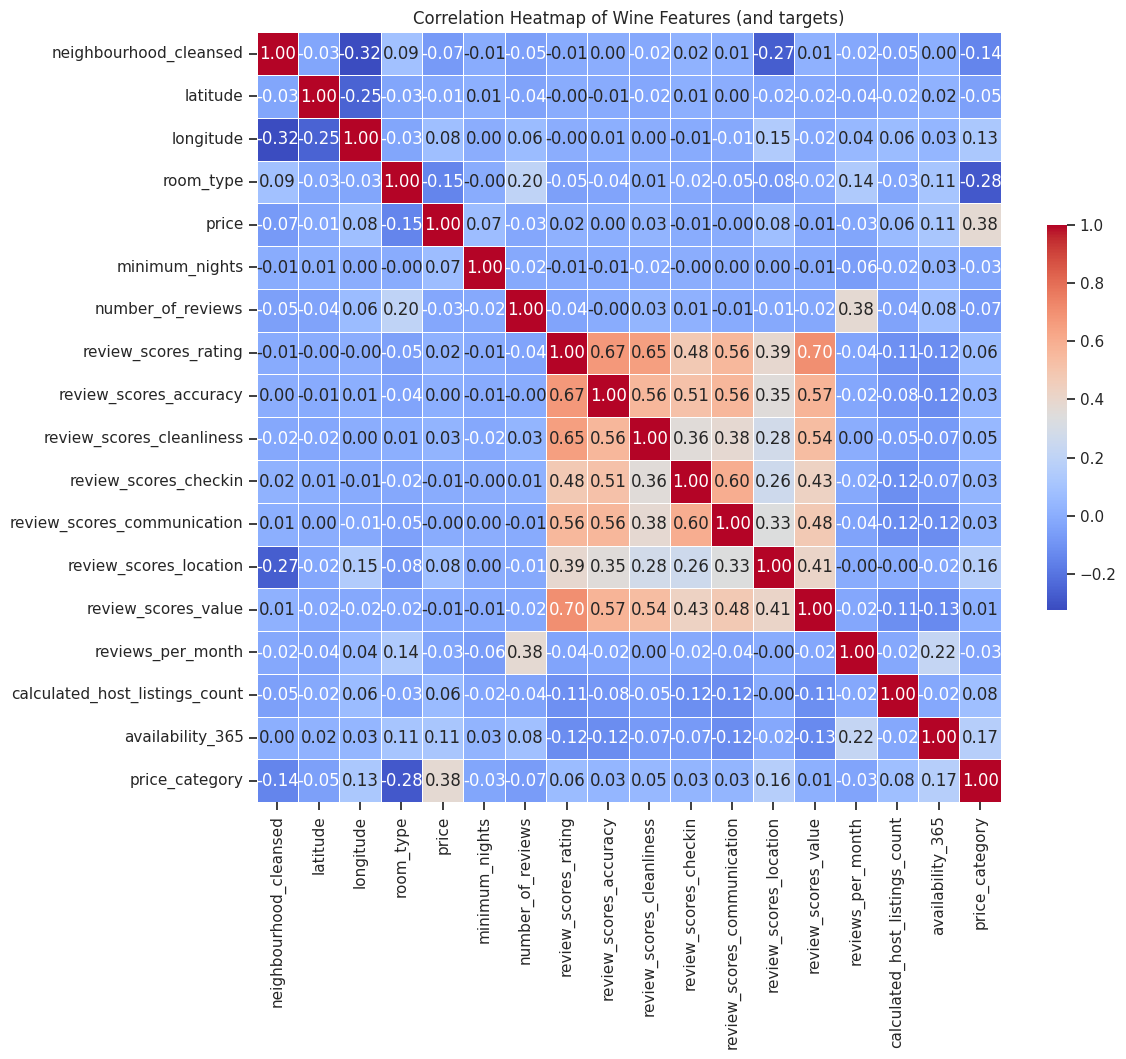

price                             1.000000
price_category                    0.375049
availability_365                  0.112570
review_scores_location            0.076005
longitude                         0.075408
minimum_nights                    0.068311
calculated_host_listings_count    0.055396
review_scores_cleanliness         0.026803
review_scores_rating              0.015634
review_scores_accuracy            0.004699
review_scores_communication      -0.003418
review_scores_checkin            -0.006129
review_scores_value              -0.008720
latitude                         -0.014144
number_of_reviews                -0.026989
reviews_per_month                -0.031530
neighbourhood_cleansed           -0.074526
room_type                        -0.145561
Name: price, dtype: float64

In [45]:
adapted_data = data_filtered.drop(["id", "name", "host_id", "host_name", "last_review"], axis='columns')


adapted_data = adapted_data.dropna()

neighbourhood_mapping = {neighbourhood: index for index, neighbourhood in enumerate(neighbourhoods)}
adapted_data['neighbourhood_cleansed'] = adapted_data['neighbourhood_cleansed'].map(neighbourhood_mapping)

rooms = adapted_data["room_type"].unique()

rooms
room_mapping = {room: index for index, room in enumerate(rooms)}
adapted_data["room_type"] = adapted_data["room_type"].map(room_mapping)

# adapted_data.corr()["price"]


# pandas has a built-in correlation method
corr = adapted_data.corr()

# init a matplotlib figure for displaying
plt.figure(figsize=(12, 10))

# use seaborn for a neat heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={'shrink': .5})

# we can also add a title
plt.title('Correlation Heatmap of Wine Features (and targets)')

plt.show()
corr["price"].sort_values(ascending=False)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = adapted_data.drop(["price"], axis=1)
Y = adapted_data["price"]

# Subselect for choosen features
X_OLS = X[['price_category', 'availability_365', 'review_scores_location']].copy()


# while there is no indication it will make much of a difference,
# let's add an interaction term for X_OLS just to see how it could look
# X_OLS['alcohol * volatile acidity'] = X_OLS['alcohol'] * X_OLS['volatile acidity']

# split the data into training and testing sets (we use the same random state to keep the same X->y relation)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
X_OLS_train, X_OLS_test = train_test_split(X_OLS, test_size=0.2, random_state=7)

# scale the features to z values
# (remember, regression can be sensitive to unnormalized variables, i.e. differences in ranges of the values)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # notice we fit the scaler to the training data
X_test_scaled = scaler.transform(X_test) # and then we apply the fitted scaler to the test data
                                         # we MUST NOT learn from the test data, not even scales

# scale the OLS features separately
OLS_scaler = StandardScaler()
X_OLS_train_scaled = OLS_scaler.fit_transform(X_OLS_train)
X_OLS_test_scaled = OLS_scaler.transform(X_OLS_test)

# fit the OLS model
ols_model = LinearRegression()
ols_model.fit(X_OLS_train_scaled, y_train)

# fit the ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# fit the lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# predict training data to compare with predictions on test data (learned data vs. unseen data)
ols_train_pred = ols_model.predict(X_OLS_train_scaled)
ridge_train_pred = ridge_model.predict(X_train_scaled)
lasso_train_pred = lasso_model.predict(X_train_scaled)

# predict test data
ols_test_pred = ols_model.predict(X_OLS_test_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)
lasso_test_pred = lasso_model.predict(X_test_scaled)

# evaluate training error using MSE
ols_train_mse = mean_squared_error(y_train, ols_train_pred)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)

# evaluate test error using MSE
ols_test_mse = mean_squared_error(y_test, ols_test_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

# evaluate training R²
ols_train_r2 = r2_score(y_train, ols_train_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)

# evaluate test R²
ols_test_r2 = r2_score(y_test, ols_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

# print stats
print("OLS Mean Squared Error (train / test):", ols_train_mse, "/", ols_test_mse)
print("Ridge Mean Squared Error (train / test):", ridge_train_mse, "/", ridge_test_mse)
print("Lasso Mean Squared Error (train / test):", lasso_train_mse, "/", lasso_test_mse)
print("")
print("OLS R² (train / test):", ols_train_r2, "/", ols_test_r2)
print("Ridge R² (train / test):", ridge_train_r2, "/", ridge_test_r2)
print("Lasso R² (train / test):", lasso_train_r2, "/", lasso_test_r2)

OLS Mean Squared Error (train / test): 1367716.743901544 / 1078328.0660503902
Ridge Mean Squared Error (train / test): 1345002.7115548227 / 1085711.1236623703
Lasso Mean Squared Error (train / test): 1344912.8378170854 / 1086556.2963766998

OLS R² (train / test): 0.13893224612125543 / 0.16567230573588465
Ridge R² (train / test): 0.15323222519333168 / 0.15995986104677962
Lasso R² (train / test): 0.1532888066293865 / 0.15930593111190894


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brønshøj-Husum,55.739028,12.487433,Entire home/apt,856.0,6,...,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,0
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,1050.0,2,...,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,1
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,450.0,3,...,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,0
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,400.0,1,...,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select the features and target variable
features = data_filtered[['minimum_nights', 'number_of_reviews', 'review_scores_rating']]
target = data_filtered['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)

# Model 2: Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)

# Model 3: Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_rmse = mean_squared_error(y_test, forest_predictions, squared=False)

# Print the root mean squared error for each model
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree Regression RMSE:", tree_rmse)
print("Random Forest Regression RMSE:", forest_rmse)

/home/bozho/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/bozho/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 934.5955271253624
Decision Tree Regression RMSE: 1042.976101424319
Random Forest Regression RMSE: 996.2958910609941


/home/bozho/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
